In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg
from boto3 import client
from io import BytesIO
from tqdm import tqdm_notebook as tqdm
import boto3

In [3]:
cd BookCovers/

/Users/gordonchen/Documents/Projects/Judge_a_book/BookCovers


In [4]:
img = cv2.imread('1250052157.png')

In [5]:
img.shape

(200, 128, 3)

In [5]:
def plothist(image):
    color = ('b', 'g', 'r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

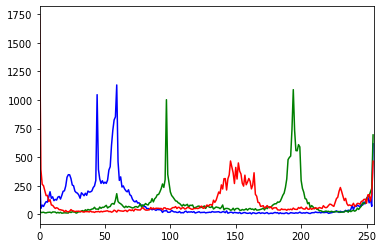

In [6]:
plothist(img)

In [7]:
import os

In [8]:
directory = os.fsencode('/Users/gordonchen/Documents/Projects/Judge_a_book/BookCovers')

In [15]:
for file in os.listdir(directory)[:1]:
    filename = os.fsdecode(file)
    print(filename)
    img = cv2.imread(filename)
    red = [img[:,:,2].mean()]
    blue = [img[:,:,0].mean()]
    green = [img[:,:,1].mean()]
    
#     blue_hist = cv2.calcHist([img], [0], None, [8], [0,256])
#     green_hist = cv2.calcHist([img], [1], None, [32], [0,256])
#     red_hist = cv2.calcHist([img], [2], None, [32], [0,256])
    df_blue = pd.DataFrame(data=blue, columns=['blue'])
    df_green = pd.DataFrame(data=green, columns=['green'])
    df_red = pd.DataFrame(data=red, columns=['red'])
    result = pd.concat([df_blue, df_green, df_red], axis=1, sort=False)
#     df_out = result.stack()
#     df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
#     trans_df = df_out.to_frame().T
    result.insert(0, 'isbn', filename[:-4])
#     hist_df = trans_df

1250052157.png


In [16]:
result

,isbn,blue,green,red
0,1250052157,72.492539,149.762656,136.385234


In [ ]:
for file in os.listdir(directory)[1:]:
    filename = os.fsdecode(file)
    print(filename)
    img = cv2.imread(filename)
    blue_hist = cv2.calcHist([img], [0], None, [32], [0,256])
    green_hist = cv2.calcHist([img], [1], None, [32], [0,256])
    red_hist = cv2.calcHist([img], [2], None, [32], [0,256])
    df_blue = pd.DataFrame(data=blue_hist, columns=['blue'])
    df_green = pd.DataFrame(data=green_hist, columns=['green'])
    df_red = pd.DataFrame(data=red_hist, columns=['red'])
    result = pd.concat([df_blue, df_green, df_red], axis=1, sort=False)
    df_out = result.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    trans_df = df_out.to_frame().T
    trans_df.insert(0, 'isbn', filename[:-4])
    hist_df.append(trans_df)

In [19]:
bucket = 'judge-a-book'
folder = 'BookCovers/'
conn = client('s3')
s3 = boto3.resource('s3')
files_in_bucket = list(s3.Bucket('judge-a-book').objects.all())
coversisbn = [file.key[11:-4] for file in files_in_bucket
              if file.key.startswith('BookCovers')]
histogramsisbn = [file.key[10:-5] for file in files_in_bucket
                  if file.key.startswith('histograms')]
leftover = list(set(coversisbn) - set(histogramsisbn))
leftoverpngs = ['BookCovers/'+str(isbn)+'.png' for isbn in leftover]

In [20]:
for image in leftoverpngs[:1]:
    object = s3.Bucket(bucket).Object(image)
    print(image)
    with open('image.png', 'wb') as f:
        object.download_fileobj(f)
    img = cv2.imread('image.png')
    red = [img[:,:,2].mean()]
    blue = [img[:,:,0].mean()]
    green = [img[:,:,1].mean()]
    
#     blue_hist = cv2.calcHist([img], [0], None, [32], [0, 256])
#     green_hist = cv2.calcHist([img], [1], None, [32], [0, 256])
#     red_hist = cv2.calcHist([img], [2], None, [32], [0, 256])
    df_blue = pd.DataFrame(data=blue, columns=['blue'])
    df_green = pd.DataFrame(data=green, columns=['green'])
    df_red = pd.DataFrame(data=red, columns=['red'])
    result = pd.concat([df_blue, df_green, df_red], axis=1, sort=False)
#     df_out = result.stack()
#     df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
#     trans_df = df_out.to_frame().T
    result.insert(0, 'isbn', image[11:-4])
#     hist_df = trans_df

BookCovers/1599901927.png


In [21]:
result

,isbn,blue,green,red
0,1599901927,141.225092,177.505561,215.409007


In [23]:
for image in leftoverpngs[1:]:
    object = s3.Bucket(bucket).Object(image)
    with open('image.png', 'wb') as f:
        object.download_fileobj(f)
    img = cv2.imread('image.png')
    red = [img[:,:,2].mean()]
    blue = [img[:,:,0].mean()]
    green = [img[:,:,1].mean()]
    
#     blue_hist = cv2.calcHist([img], [0], None, [32], [0, 256])
#     green_hist = cv2.calcHist([img], [1], None, [32], [0, 256])
#     red_hist = cv2.calcHist([img], [2], None, [32], [0, 256])
    df_blue = pd.DataFrame(data=blue, columns=['blue'])
    df_green = pd.DataFrame(data=green, columns=['green'])
    df_red = pd.DataFrame(data=red, columns=['red'])
    trans_df = pd.concat([df_blue, df_green, df_red], axis=1, sort=False)
#     df_out = result.stack()
#     df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
#     trans_df = df_out.to_frame().T
    trans_df.insert(0, 'isbn', image[11:-4])
    result = result.append(trans_df, ignore_index=True)

In [25]:
result

,isbn,blue,green,red
0,1599901927,141.225092,177.505561,215.409007
1,8415594828,102.218585,190.058614,187.763558
2,0515157635,63.026062,59.296692,59.767029
3,0590819194,238.626700,238.833428,238.665763
4,0395522781,195.211215,212.979706,219.304641
...,...,...,...,...
8783,0688175457,53.030022,95.143524,111.513954
8784,0374301204,165.966736,180.791382,176.979736
8785,0679879358,85.875685,166.886719,135.281693
8786,0061251941,151.653706,141.180172,110.717539


In [24]:
result.to_csv('average_rbg.csv')